In [1]:
from sklearn.utils.discovery import all_displays

displays = all_displays()
displays

[('CalibrationDisplay', sklearn.calibration.CalibrationDisplay),
 ('ConfusionMatrixDisplay',
  sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay),
 ('DecisionBoundaryDisplay',
  sklearn.inspection._plot.decision_boundary.DecisionBoundaryDisplay),
 ('DetCurveDisplay', sklearn.metrics._plot.det_curve.DetCurveDisplay),
 ('LearningCurveDisplay', sklearn.model_selection._plot.LearningCurveDisplay),
 ('PartialDependenceDisplay',
  sklearn.inspection._plot.partial_dependence.PartialDependenceDisplay),
 ('PrecisionRecallDisplay',
  sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay),
 ('PredictionErrorDisplay',
  sklearn.metrics._plot.regression.PredictionErrorDisplay),
 ('RocCurveDisplay', sklearn.metrics._plot.roc_curve.RocCurveDisplay),
 ('ValidationCurveDisplay',
  sklearn.model_selection._plot.ValidationCurveDisplay)]

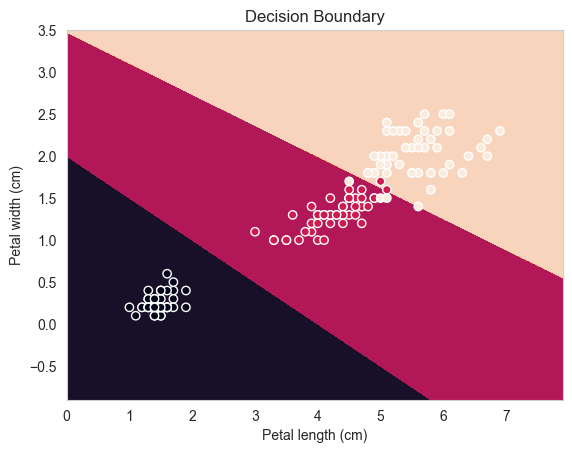

In [2]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']]
y = iris.target


svc_clf = make_pipeline(StandardScaler(),
                        SVC(kernel='linear', C=1))
svc_clf.fit(X, y)

display = DecisionBoundaryDisplay.from_estimator(svc_clf, X,
                                                 grid_resolution=1000,
                                                 xlabel="Petal length (cm)",
                                                 ylabel="Petal width (cm)")
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='w')
plt.title("Decision Boundary")
plt.show()

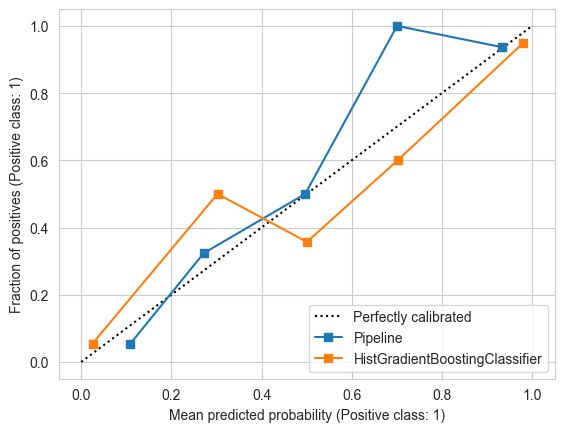

In [3]:
from sklearn.calibration import CalibrationDisplay
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import HistGradientBoostingClassifier

X, y = make_classification(n_samples=1000,
                           n_classes=2, n_features=5,
                           random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=42)
proba_clf = make_pipeline(StandardScaler(),
                          SVC(kernel="rbf", gamma="auto",
                              C=10, probability=True))
proba_clf.fit(X_train, y_train)

CalibrationDisplay.from_estimator(proba_clf,
                                  X_test, y_test)

hist_clf = HistGradientBoostingClassifier()
hist_clf.fit(X_train, y_train)

ax = plt.gca()
CalibrationDisplay.from_estimator(hist_clf,
                                  X_test, y_test,
                                  ax=ax)
plt.show()

/Users/pradhanojas/anaconda3/envs/ba-rsch/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


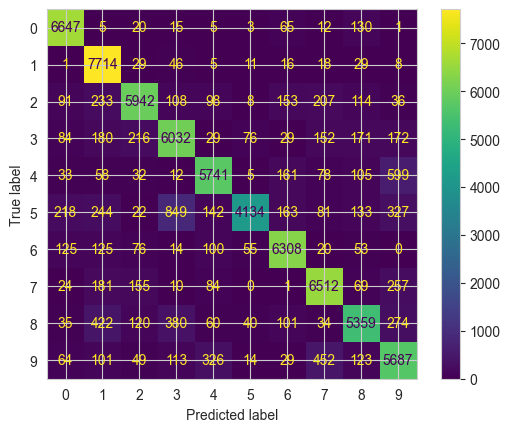

In [4]:
# from sklearn.datasets import fetch_openml
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import ConfusionMatrixDisplay
# 
# digits = fetch_openml('mnist_784', version=1)
# X, y = digits.data, digits.target
# rf_clf = RandomForestClassifier(max_depth=5, random_state=42)
# rf_clf.fit(X, y)
# 
# ConfusionMatrixDisplay.from_estimator(rf_clf, X, y)
# plt.show()

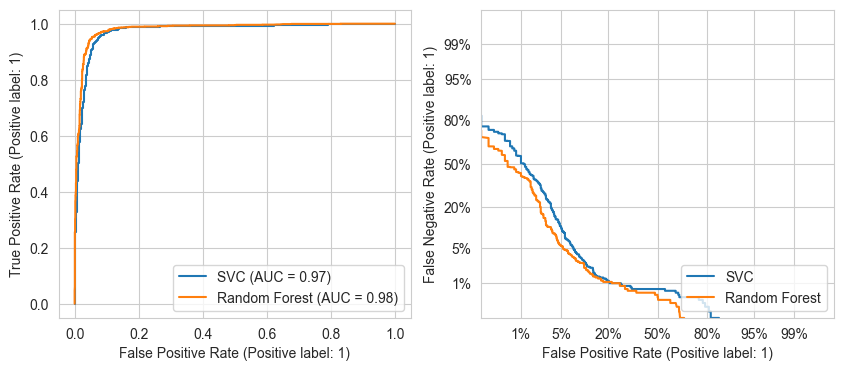

In [5]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import DetCurveDisplay

X, y = make_classification(n_samples=10_000, n_features=5,
                           n_classes=2, n_informative=2)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=42,
                                                    stratify=y)


classifiers = {
    "SVC": make_pipeline(StandardScaler(), SVC(kernel="linear", C=0.1, random_state=42)),
    "Random Forest": RandomForestClassifier(max_depth=5, random_state=42)
}

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(10, 4))
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
    DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name=name)

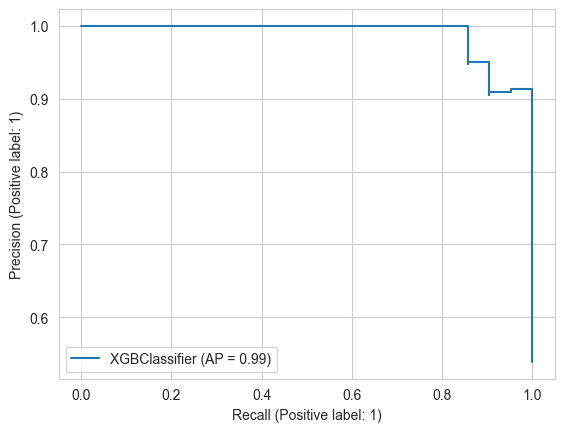

In [9]:
from xgboost import XGBClassifier
from sklearn.datasets import load_wine
from sklearn.metrics import PrecisionRecallDisplay

wine = load_wine()
X, y = wine.data[wine.target<=1], wine.target[wine.target<=1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=42)

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

PrecisionRecallDisplay.from_estimator(xgb_clf, X_test, y_test)
plt.show()

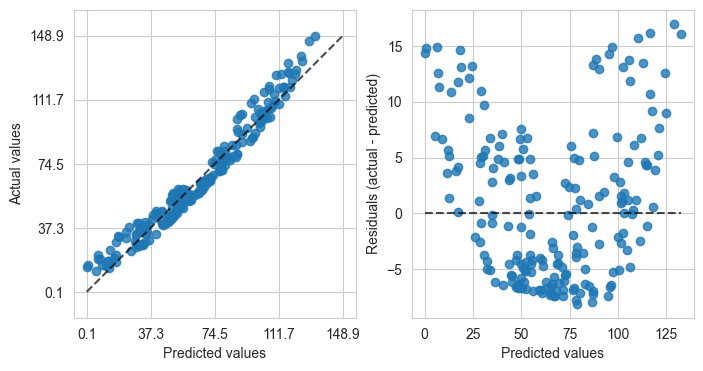

In [12]:
from sklearn.svm import SVR
from sklearn.metrics import PredictionErrorDisplay
import numpy as np

rng = np.random.default_rng(42)
X = rng.random(size=(200, 2)) * 10
y = X[:, 0]**2 + 5 * X[:, 1] + 10 + rng.normal(loc=0.0, scale=0.1, size=(200,))

reg = make_pipeline(StandardScaler(), SVR(kernel='linear', C=10))
reg.fit(X, y)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
PredictionErrorDisplay.from_estimator(reg, X, y, ax=axes[0], kind="actual_vs_predicted")
PredictionErrorDisplay.from_estimator(reg, X, y, ax=axes[1], kind="residual_vs_predicted")
plt.show()

In [13]:
reg = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=10))

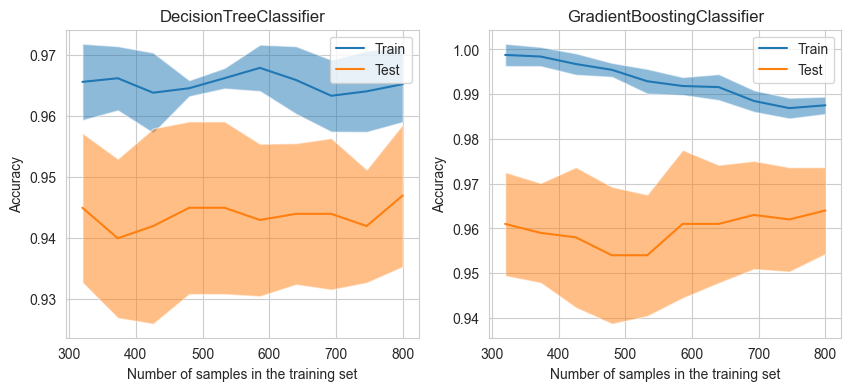

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import LearningCurveDisplay

X, y = make_classification(n_samples=1000, n_classes=2, n_features=10,
                           n_informative=2, n_redundant=0, n_repeated=0)

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=50, max_depth=3, tol=1e-3)

train_sizes = np.linspace(0.4, 1.0, 10)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
LearningCurveDisplay.from_estimator(tree_clf, X, y,
                                    train_sizes=train_sizes,
                                    ax=axes[0],
                                    scoring='accuracy')
axes[0].set_title('DecisionTreeClassifier')
LearningCurveDisplay.from_estimator(gb_clf, X, y,
                                    train_sizes=train_sizes,
                                    ax=axes[1],
                                    scoring='accuracy')
axes[1].set_title('GradientBoostingClassifier')
plt.show()

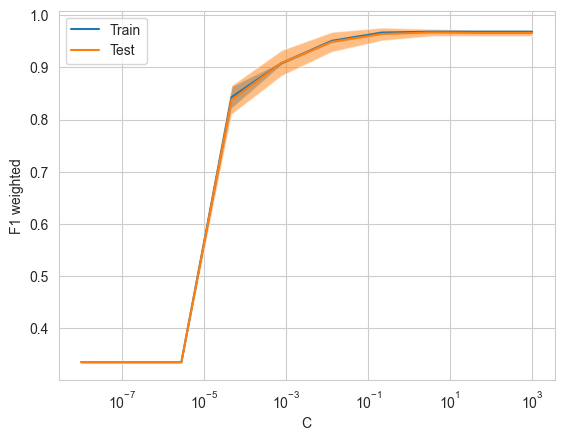

In [15]:
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.linear_model import LogisticRegression

param_name, param_range = "C", np.logspace(-8, 3, 10)
lr_clf = LogisticRegression()

ValidationCurveDisplay.from_estimator(lr_clf, X, y,
                                      param_name=param_name,
                                      param_range=param_range,
                                      scoring='f1_weighted',
                                      cv=5, n_jobs=-1)
plt.show()
